In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Data/ford.csv")
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [4]:
data['year'] = data['year'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  object 
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.2+ MB


In [5]:
numeric_data = data.select_dtypes('number')
categorical_data = data.select_dtypes('object')
print(numeric_data.columns)
print(categorical_data.columns)

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')
Index(['model', 'year', 'transmission', 'fuelType'], dtype='object')


In [6]:
numeric_data.describe()

,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,495.000000,1.000000,0.000000,20.800000,0.000000
25%,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,54995.000000,177644.000000,580.000000,201.800000,5.000000


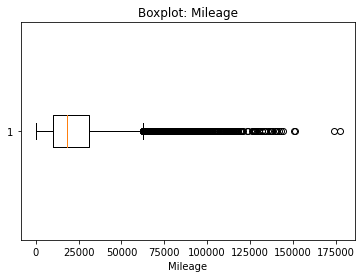

In [7]:
plt.boxplot(data["mileage"], vert=False)
plt.xlabel("Mileage")
plt.title("Boxplot: Mileage");

In [8]:
low, high = data['mileage'].quantile([0.05, 0.90])
mask_ma = data['mileage'].between(low, high)
data = data[mask_ma]

In [9]:
print(low, high)

2500.0 47943.5


Text(0.5, 1.0, 'Boxplot : Mileage')

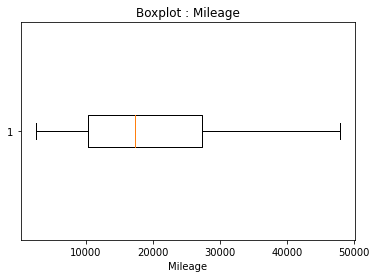

In [10]:
plt.boxplot(data['mileage'], vert=False)
plt.xlabel('Mileage')
plt.title("Boxplot : Mileage")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15273 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15273 non-null  object 
 1   year          15273 non-null  object 
 2   price         15273 non-null  int64  
 3   transmission  15273 non-null  object 
 4   mileage       15273 non-null  int64  
 5   fuelType      15273 non-null  object 
 6   tax           15273 non-null  int64  
 7   mpg           15273 non-null  float64
 8   engineSize    15273 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.2+ MB


In [12]:
data.describe()

,price,mileage,tax,mpg,engineSize
count,15273.000000,15273.000000,15273.000000,15273.000000,15273.000000
mean,12538.329143,19445.860997,114.691744,58.105022,1.327578
std,4289.921097,11231.021011,59.518719,9.590704,0.420933
min,1995.000000,2500.000000,0.000000,20.800000,0.000000
25%,9498.000000,10300.000000,125.000000,53.300000,1.000000
50%,11499.000000,17250.000000,145.000000,58.900000,1.200000
75%,15300.000000,27328.000000,145.000000,65.700000,1.500000
max,54995.000000,47937.000000,580.000000,201.800000,5.000000


In [13]:
corr = data.select_dtypes('number').drop(columns='price').corr()

<AxesSubplot:>

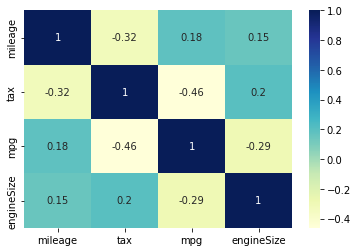

In [14]:
sns.heatmap(corr, cmap='YlGnBu', annot = True)

after looking this visualisation or above "corr" table we can say that their is no multicolinearity in our feature columns,

In [15]:
for i in categorical_data:
  print(i, "has", data[i].nunique(), "unique_value")

model has 21 unique_value
year has 18 unique_value
transmission has 3 unique_value
fuelType has 5 unique_value


In [16]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


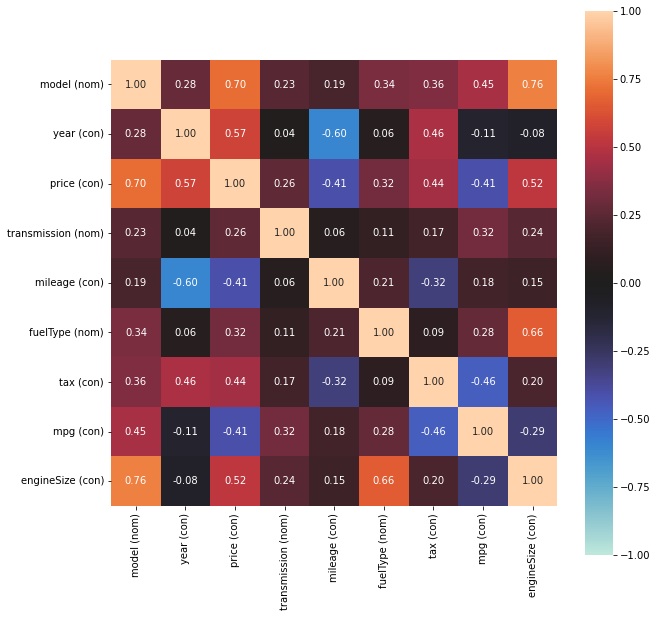

{'ax': <AxesSubplot:>,
 'corr':                     model (nom)  year (con)  price (con)  transmission (nom)  \
 model (nom)            1.000000    0.282776     0.704763            0.234924   
 year (con)             0.282776    1.000000     0.573976            0.035177   
 price (con)            0.704763    0.573976     1.000000            0.261726   
 transmission (nom)     0.234924    0.035177     0.261726            1.000000   
 mileage (con)          0.194839   -0.598424    -0.411086            0.055115   
 fuelType (nom)         0.339544    0.055893     0.315945            0.113479   
 tax (con)              0.358384    0.462156     0.444737            0.165526   
 mpg (con)              0.453454   -0.105150    -0.412900            0.315857   
 engineSize (con)       0.757987   -0.084935     0.523425            0.235889   
 
                     mileage (con)  fuelType (nom)  tax (con)  mpg (con)  \
 model (nom)              0.194839        0.339544   0.358384   0.453454   
 year

In [17]:
from dython.nominal import associations
associations(data , figsize = (10,10) , mark_columns = True)

In [18]:
data.drop(['transmission', 'fuelType'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15273 entries, 0 to 17965
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model       15273 non-null  object 
 1   year        15273 non-null  object 
 2   price       15273 non-null  int64  
 3   mileage     15273 non-null  int64  
 4   tax         15273 non-null  int64  
 5   mpg         15273 non-null  float64
 6   engineSize  15273 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 954.6+ KB


In [19]:
feature = ['model' , 'year' , 'mileage','tax','mpg' ,'engineSize']
target = ['price']
X = data[feature]
y = data[target]

In [21]:
X = pd.get_dummies(X)

In [23]:
X.shape

(15273, 43)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
v = y_train

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=42)
rf.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=42)

In [30]:
y_pred_test = rf.predict(X_test)

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.9097537798655834

## Let's make with Year as INT

In [33]:
data_int_year = data.copy()
data_int_year['year'] = data_int_year['year'].astype('int')
data_int_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15273 entries, 0 to 17965
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model       15273 non-null  object 
 1   year        15273 non-null  int64  
 2   price       15273 non-null  int64  
 3   mileage     15273 non-null  int64  
 4   tax         15273 non-null  int64  
 5   mpg         15273 non-null  float64
 6   engineSize  15273 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 954.6+ KB


In [34]:
feature_year_int = ['model' , 'year' , 'mileage','tax','mpg' ,'engineSize']
target_year_int = ['price']
X_year_int = data_int_year[feature_year_int]
y_year_int = data_int_year[target_year_int]

In [35]:
X_year_int = pd.get_dummies(X_year_int)

In [36]:
X_year_int_train , X_year_int_test , y_year_int_train ,y_year_int_test = train_test_split(X_year_int , y_year_int , test_size = 0.25)

In [37]:
X_year_int_train = scaler.fit_transform(X_year_int_train)
X_year_int_test = scaler.fit_transform(X_year_int_test)

In [39]:
rf2 = RandomForestRegressor(n_estimators=42)
rf2.fit(X_year_int_train, y_year_int_train.values.ravel())

RandomForestRegressor(n_estimators=42)

In [40]:
y_year_int_pred = rf2.predict(X_year_int_test)

In [42]:
r2_score(y_year_int_test ,y_year_int_pred)

0.8922281324822893